# **Data Loading**

Let's start by loading the data from the CSV file and inspecting it.PANDAS and SQL are used for cleaning and visualization of data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
file_path ='/kaggle/input/spotify-dataset-for-playing-around-with-sql/spotify_tracks.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


# **Data Cleaning**

Let's start by importing the required library and performing the SQL queries.

In [2]:
import pandasql as ps

# Define a query to clean the data
query = """
SELECT DISTINCT * 
FROM data
WHERE id IS NOT NULL
AND name IS NOT NULL
AND genre IS NOT NULL
AND artists IS NOT NULL
AND album IS NOT NULL
AND popularity IS NOT NULL
AND duration_ms IS NOT NULL
AND explicit IS NOT NULL
"""
# Apply the query
cleaned_data = ps.sqldf(query, locals())

# Display the first few rows of the cleaned dataframe
cleaned_data.head()


,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,0
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,0
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,0
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,0
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,0


# Exploratory Data Analysis

**Summary Statistics**

In [3]:
summary_stats = cleaned_data.describe()
print(summary_stats)
popularity_stats = cleaned_data['popularity'].describe()
print("Popularity Summary Statistics:\n", popularity_stats)

duration_stats = cleaned_data['duration_ms'].describe()
print("Duration Summary Statistics:\n", duration_stats)

        popularity   duration_ms     explicit
count  6300.000000  6.300000e+03  6300.000000
mean     30.754762  2.028477e+05     0.189524
std      19.948991  1.210299e+05     0.391955
min       0.000000  3.006000e+04     0.000000
25%      16.000000  1.476870e+05     0.000000
50%      29.000000  1.916070e+05     0.000000
75%      45.000000  2.369625e+05     0.000000
max      90.000000  3.601658e+06     1.000000
Popularity Summary Statistics:
 count    6300.000000
mean       30.754762
std        19.948991
min         0.000000
25%        16.000000
50%        29.000000
75%        45.000000
max        90.000000
Name: popularity, dtype: float64
Duration Summary Statistics:
 count    6.300000e+03
mean     2.028477e+05
std      1.210299e+05
min      3.006000e+04
25%      1.476870e+05
50%      1.916070e+05
75%      2.369625e+05
max      3.601658e+06
Name: duration_ms, dtype: float64


**Genre Distribution**

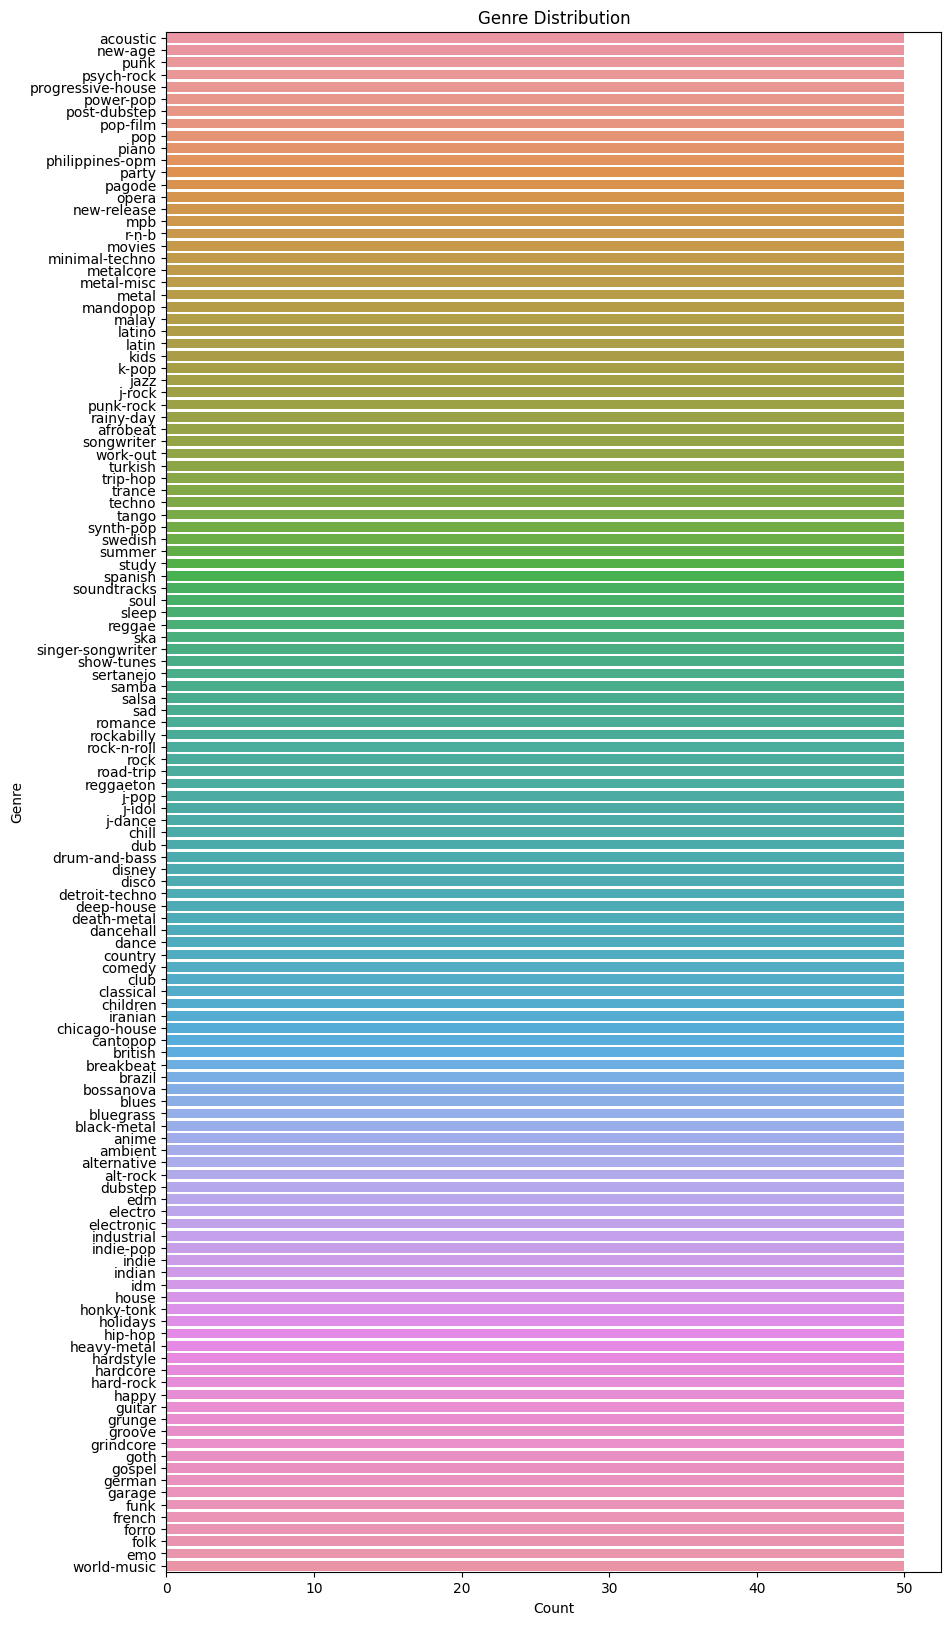

In [4]:
import seaborn as sns
# Plot genre distribution
plt.figure(figsize=(10, 20))
sns.countplot(data=cleaned_data, y='genre', order=cleaned_data['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Trends with respect to time

**Top Artists by Average Popularity**

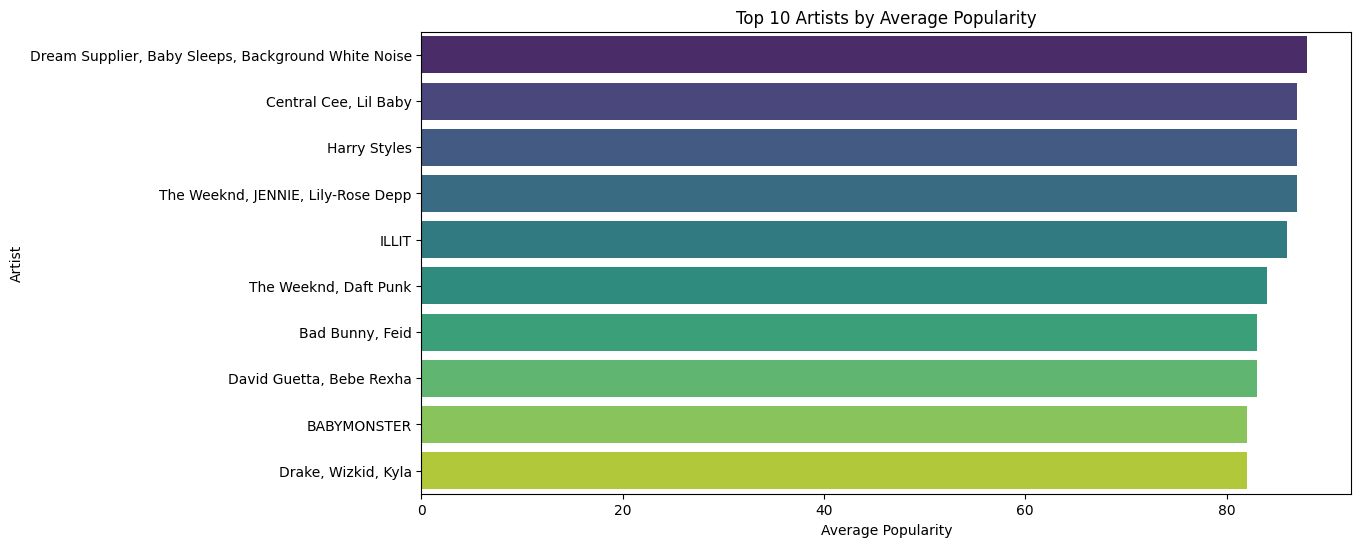

In [5]:
# Top 10 artists by average popularity
top_artists = cleaned_data.groupby('artists')['popularity'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, x='popularity', y='artists', palette='viridis')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

**Top Genres by Popularity**

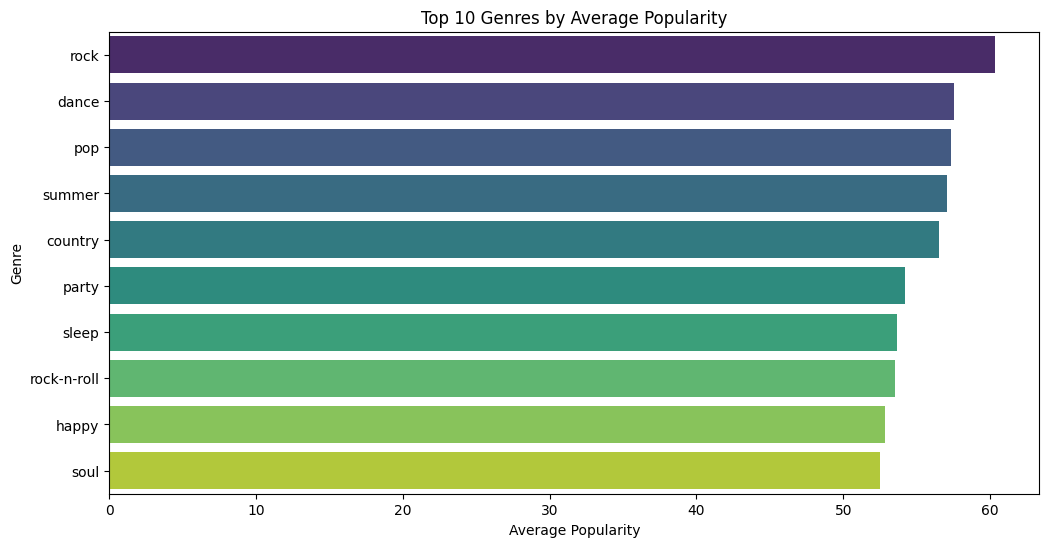

In [6]:
# Top 10 genres by average popularity
top_genres = cleaned_data.groupby('genre')['popularity'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='popularity', y='genre', palette='viridis')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

**Saving the cleaned data**

In [7]:
cleaned_data.to_csv('cleaned_spotify_tracks.csv', index=False)

# Summary

* Dream Supplier,Baby sleeps,Background White Noise have the most popularity

* Rock is the most popular genre followed by dance and pop